# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [3]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train.csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [4]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [5]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [6]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

/18 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8273 - val_loss: 0.6178 - val_accuracy: 0.7491
Epoch 863/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8201 - val_loss: 0.6151 - val_accuracy: 0.7417
Epoch 864/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8201 - val_loss: 0.6161 - val_accuracy: 0.7454
Epoch 865/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8237 - val_loss: 0.6153 - val_accuracy: 0.7454
Epoch 866/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8219 - val_loss: 0.6185 - val_accuracy: 0.7454
Epoch 867/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8219 - val_loss: 0.6105 - val_accuracy: 0.7491
Epoch 868/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8201 - val_loss: 0.6160 - val_accuracy: 0.7491
Epoch 869

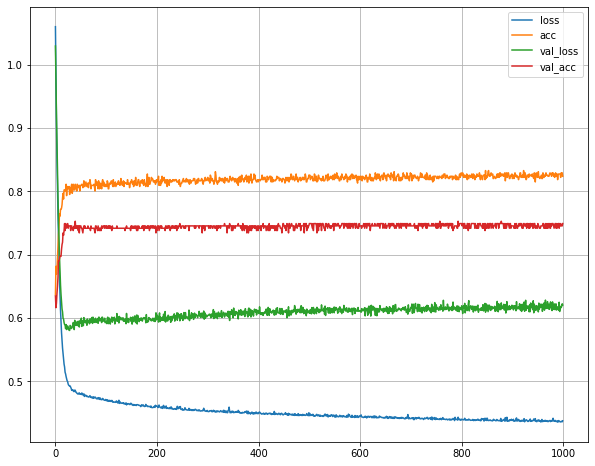

In [7]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [8]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6204401850700378
Validation accuracy: 0.7490774989128113


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

: 0.8741 - val_loss: 0.7139 - val_accuracy: 0.7454
Epoch 863/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8723 - val_loss: 0.7067 - val_accuracy: 0.7565
Epoch 864/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8723 - val_loss: 0.6997 - val_accuracy: 0.7528
Epoch 865/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8759 - val_loss: 0.7087 - val_accuracy: 0.7528
Epoch 866/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8741 - val_loss: 0.7038 - val_accuracy: 0.7565
Epoch 867/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8651 - val_loss: 0.6977 - val_accuracy: 0.7528
Epoch 868/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8813 - val_loss: 0.7034 - val_accuracy: 0.7528
Epoch 869/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3173 - 

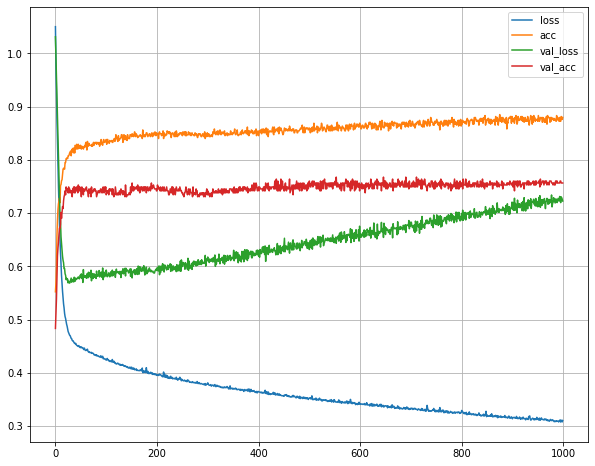

: 0.9406 - val_loss: 0.9955 - val_accuracy: 0.7306
Epoch 863/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1592 - accuracy: 0.9371 - val_loss: 1.0011 - val_accuracy: 0.7232
Epoch 864/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1574 - accuracy: 0.9460 - val_loss: 0.9930 - val_accuracy: 0.7306
Epoch 865/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1562 - accuracy: 0.9442 - val_loss: 0.9980 - val_accuracy: 0.7269
Epoch 866/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.1565 - accuracy: 0.9353 - val_loss: 0.9972 - val_accuracy: 0.7269
Epoch 867/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1613 - accuracy: 0.9406 - val_loss: 1.0076 - val_accuracy: 0.7269
Epoch 868/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1572 - accuracy: 0.9371 - val_loss: 0.9972 - val_accuracy: 0.7306
Epoch 869/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1565 - 

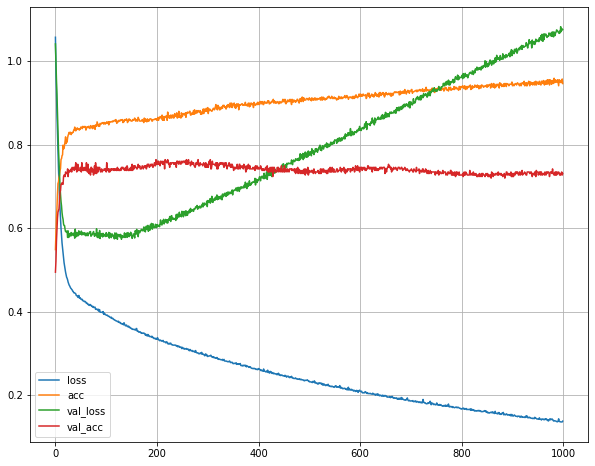

In [9]:
def viz_training_res(hist, mod, x_valid, y_valid):
    # Visualize the training results
    plt.figure(figsize=(10,8))
    plt.plot(hist.history['loss'],label='loss')
    plt.plot(hist.history['accuracy'],label='acc')
    plt.plot(hist.history['val_loss'],label='val_loss')
    plt.plot(hist.history['val_accuracy'],label='val_acc')
    plt.grid()
    plt.legend()
    score = mod.evaluate(x_valid, y_valid, verbose=0)
    print('Validation loss:', score[0])
    print('Validation accuracy:', score[1])
    plt.show()
    
def extract_features(features): # Rest is global variables that don't change 
    # Extract features
    x_train_raw = train[features]
    x_valid_raw = valid[features]

    # Normalize to zero mean
    x_mean = np.mean(x_train_raw)
    x_std = np.std(x_train_raw)
    x_train = x_train_raw - x_mean
    x_valid = x_valid_raw - x_mean

    # Fix labels. The "to_categorical" call maps integer labels {n}
    # to a vector of length N (number of labels) with a one in position n
    y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
    y_valid = keras.utils.to_categorical(validlabels, len(phonemes))
    return x_train, x_valid, y_train, y_valid


# With F1-F4
features = ["F1", "F2", "F3", "F4"]

x_train, x_valid, y_train, y_valid = extract_features(features)

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)
# Visualize the training and print metrics
viz_training_res(history, model, x_valid, y_valid)


# With all features
features = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]

x_train, x_valid, y_train, y_valid = extract_features(features)

# Create a model
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)
# Visualize the training and print metrics
viz_training_res(history, model, x_valid, y_valid)


## Observations

Altough the accuracy on the training set increases the accuracy for the validation set is decreasing slightly after a relatively short time. The loss for the validation set is also increasing quite drastically. This means that we are classifying a few samples wrong in the validation set as we train our model. These samples are being classified "more" wrong as the training progresses. This means that the model becomes more certain that the samples are e.g 'ae' when they in reality are 'iy', thus giving a larger error, but as significant decrease in accuracy.

## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

: 0.8831 - val_loss: 0.7729 - val_accuracy: 0.7638
Epoch 863/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2986 - accuracy: 0.8795 - val_loss: 0.7615 - val_accuracy: 0.7675
Epoch 864/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.8903 - val_loss: 0.7793 - val_accuracy: 0.7565
Epoch 865/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.8759 - val_loss: 0.7680 - val_accuracy: 0.7675
Epoch 866/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.8975 - val_loss: 0.7659 - val_accuracy: 0.7712
Epoch 867/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.8885 - val_loss: 0.7732 - val_accuracy: 0.7601
Epoch 868/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8831 - val_loss: 0.7648 - val_accuracy: 0.7675
Epoch 869/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2900 - 

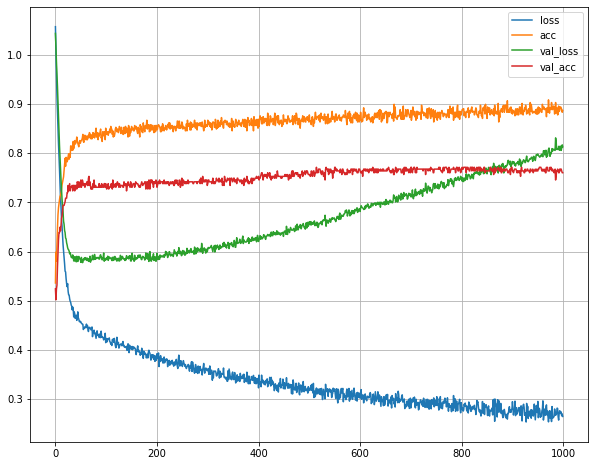

In [10]:
# With all features
features = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]

x_train, x_valid, y_train, y_valid = extract_features(features)

# Create a model
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)
# Visualize the training and print metrics
viz_training_res(history, model, x_valid, y_valid)

## Problem 3
Add multiple layers to the network and observe the results.

cy: 1.0000 - val_loss: 4.3032 - val_accuracy: 0.7232
Epoch 863/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9982 - val_loss: 4.3174 - val_accuracy: 0.7159
Epoch 864/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 4.3558 - val_accuracy: 0.7159
Epoch 865/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 4.3789 - val_accuracy: 0.7085
Epoch 866/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 4.4137 - val_accuracy: 0.7085
Epoch 867/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 4.4721 - val_accuracy: 0.7085
Epoch 868/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9964 - val_loss: 4.4929 - val_accuracy: 0.7122
Epoch 869/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0072 

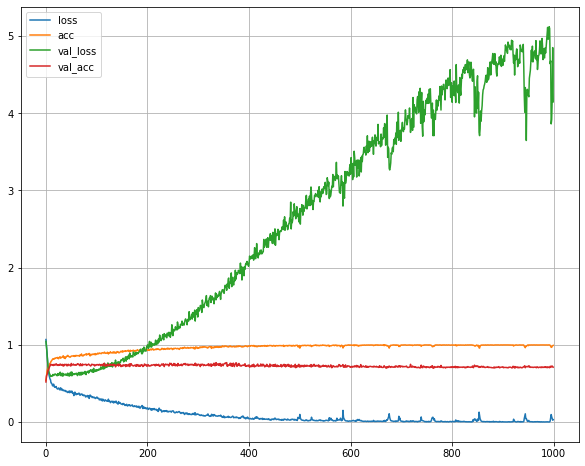

In [11]:
# With all features
features = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]

x_train, x_valid, y_train, y_valid = extract_features(features)

# Create a model
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=x_train.shape[1]),

    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=32),

    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=128),

    keras.layers.Dropout(0.3),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)
# Visualize the training and print metrics
viz_training_res(history, model, x_valid, y_valid)

## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

ch 864/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.2732 - accuracy: 0.8782 - val_loss: 0.7226 - val_accuracy: 0.7576
Epoch 865/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.8794 - val_loss: 0.7397 - val_accuracy: 0.7646
Epoch 866/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.8775 - val_loss: 0.7071 - val_accuracy: 0.7671
Epoch 867/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.2730 - accuracy: 0.8793 - val_loss: 0.7298 - val_accuracy: 0.7516
Epoch 868/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.2719 - accuracy: 0.8803 - val_loss: 0.7321 - val_accuracy: 0.7645
Epoch 869/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.8790 - val_loss: 0.7177 - val_accuracy: 0.7681
Epoch 870/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.2717 - accuracy: 0.8799 - val_loss: 0.7142 - va

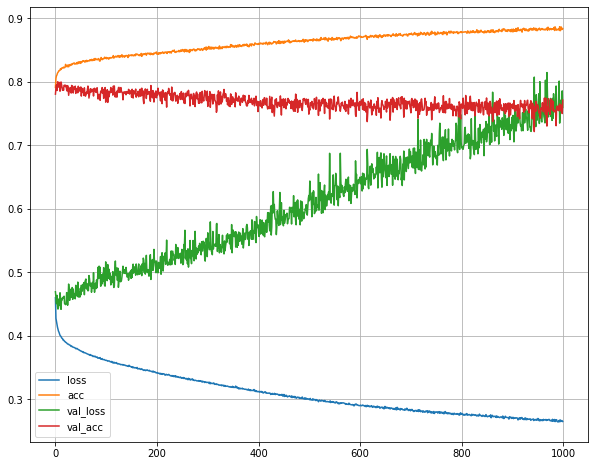

Validation los: 0.7598050832748413
Validation accuracy: 0.7711805105209351


In [13]:
genders = ["M", "F"]
# With all features

# We will be classifying three different vowels. Extract the training and validation data
# same as before, only for gender. Using all phonems
train = rawtrain[rawtrain["Gender"].isin(genders)]
valid = rawvalid[rawvalid["Gender"].isin(genders)]
trainlabels = [genders.index(ph) for ph in train["Gender"]]
validlabels = [genders.index(ph) for ph in valid["Gender"]]

features = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean


# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
# same as before, only for gender
y_train = keras.utils.to_categorical(trainlabels, len(genders))
y_valid = keras.utils.to_categorical(validlabels, len(genders))


# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation los:', score[0])
print('Validation accuracy:', score[1])